In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('netflix_titles.csv')

In [3]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [4]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [5]:
# let's seperate movie rows from tv rows by creating seperate variable for each one
netflix_movies = df[df['type'] == 'Movie']
netflix_shows = df[df['type'] == 'TV Show']

# Exploratory Data Analysis (EDA)

### Count of Movies and TV shows on Netflix

Text(0.5, 1.0, 'Number of Movies and TV Shows on Netflix')

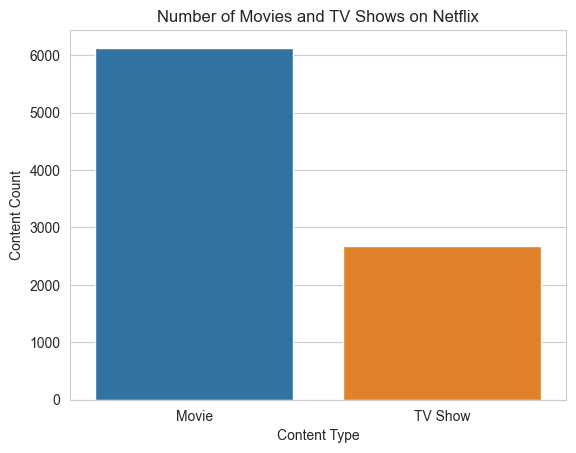

In [6]:
import seaborn as sns

# Get the number of movies/shows on netflix
sns.set_style('whitegrid')

ax = sns.countplot(data=df, x='type')
ax.set_xlabel('Content Type')
ax.set_ylabel('Content Count')
ax.set_title('Number of Movies and TV Shows on Netflix')

### Movie and TV Shows Ratings

Text(0.5, 1.0, 'Top 10 Movie Ratings on Netflix')

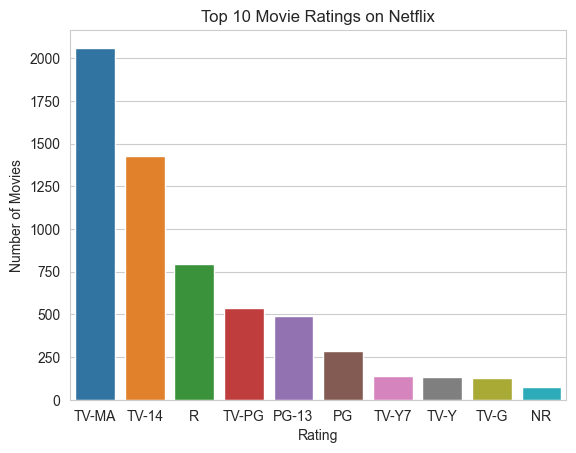

In [7]:
# Get top 10 movies ratings on Netflix 

ax = sns.countplot(data=netflix_movies, x='rating', order=netflix_movies['rating'].value_counts().index[:10])
ax.set_xlabel('Rating')
ax.set_ylabel('Number of Movies')
ax.set_title('Top 10 Movie Ratings on Netflix')

Text(0.5, 1.0, 'Top 10 TV Shows Ratings on Netflix')

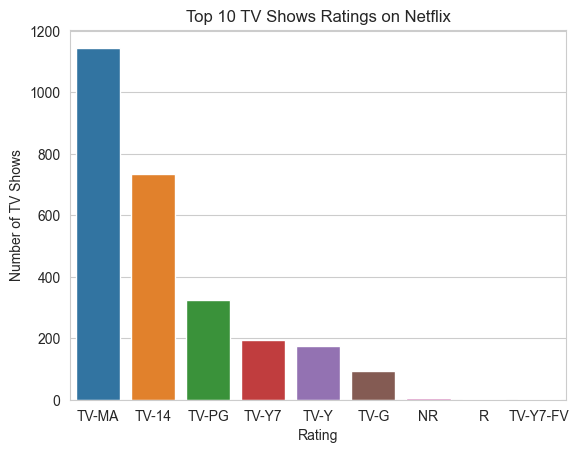

In [8]:
# Get top 10 tv shows ratings on Netflix 

ax = sns.countplot(data=netflix_shows, x='rating', order=netflix_shows['rating'].value_counts().index[:10])
ax.set_xlabel('Rating')
ax.set_ylabel('Number of TV Shows')
ax.set_title('Top 10 TV Shows Ratings on Netflix')

### Run-time for Movies and TV shows

In [9]:
netflix_shows['duration'].unique()

array(['2 Seasons', '1 Season', '9 Seasons', '4 Seasons', '5 Seasons',
       '3 Seasons', '6 Seasons', '7 Seasons', '10 Seasons', '8 Seasons',
       '17 Seasons', '13 Seasons', '15 Seasons', '12 Seasons',
       '11 Seasons'], dtype=object)

Text(0.5, 1.0, 'How Many Seasons TV Shows on Netflix Run for (Top Five Results)')

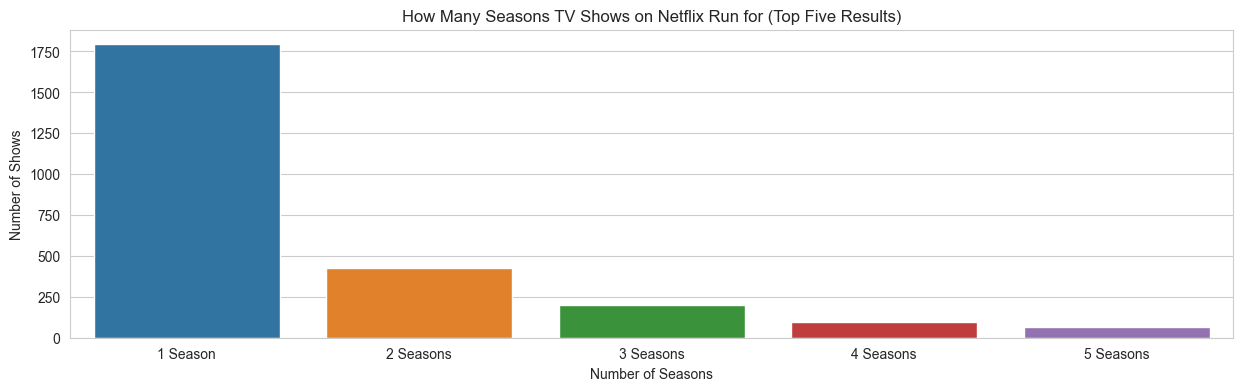

In [10]:
# For How many seasons TV shows on netflix run for

plt.figure(figsize=(15,4))

ax = sns.countplot(data=netflix_shows, x='duration', order=netflix_shows['duration'].value_counts().index[0:5])
ax.set_xlabel('Number of Seasons')
ax.set_ylabel('Number of Shows')
ax.set_title('How Many Seasons TV Shows on Netflix Run for (Top Five Results)')

In [11]:
netflix_movies['duration'].value_counts()

duration
90 min     152
94 min     146
93 min     146
97 min     146
91 min     144
          ... 
212 min      1
8 min        1
186 min      1
193 min      1
191 min      1
Name: count, Length: 205, dtype: int64

In [12]:
netflix_movies['duration'].isnull().sum()

3

In [13]:
netflix_movies.dropna(subset=['duration'], inplace=True)
netflix_movies['duration'].isnull().sum()

0

In [14]:
# Let get the movie runtime from the duration column

movie_runtime = []

for x in netflix_movies['duration'] : 
    res = [int(i) for i in x.split() if i.isdigit()]
    runtime = int(res[0])
    movie_runtime.append(runtime)

Text(0.5, 1.0, 'Netflix Movie Runtime Distribution')

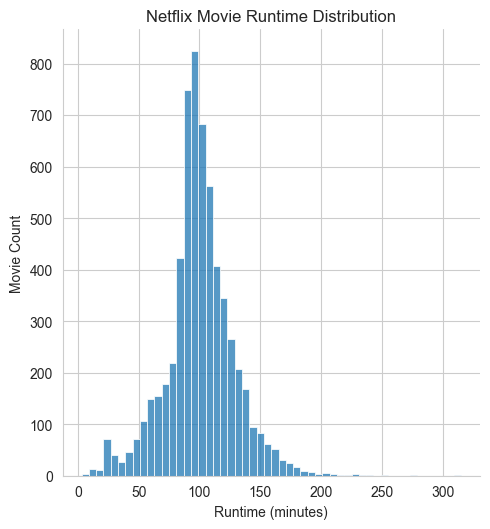

In [15]:
# Movie runtime distribution on Netflix 

ax = sns.displot(movie_runtime, binwidth=6)
ax.set_xlabels("Runtime (minutes)")
ax.set_ylabels("Movie Count")
plt.title('Netflix Movie Runtime Distribution')

### Movies and TV Shows release year

In [16]:
movie_releases_dict = {}

for x in netflix_movies['release_year'] : 
    count_of_movies = len(netflix_movies[netflix_movies['release_year'] == x])
    # print(f"Number of movies in year : {x} is: {count_of_movies}")
    if x in movie_releases_dict : 
        pass
    else :
        movie_releases_dict[x] = count_of_movies

print(movie_releases_dict)

{2020: 517, 2021: 277, 1993: 24, 1996: 21, 1998: 32, 1997: 34, 2010: 153, 2013: 225, 2017: 766, 1975: 7, 1978: 7, 1983: 11, 1987: 8, 2012: 173, 2001: 40, 2002: 44, 2003: 51, 2004: 55, 2011: 145, 2008: 113, 2009: 118, 2007: 74, 2005: 67, 2006: 82, 2018: 767, 2019: 633, 1994: 20, 2015: 397, 1982: 17, 1989: 15, 2014: 264, 1990: 19, 1991: 16, 1999: 32, 2016: 658, 1986: 11, 1984: 12, 1980: 11, 1961: 1, 2000: 33, 1995: 23, 1985: 9, 1992: 20, 1976: 9, 1959: 1, 1988: 16, 1981: 12, 1972: 4, 1964: 2, 1954: 2, 1979: 10, 1958: 3, 1956: 2, 1963: 1, 1970: 2, 1973: 10, 1960: 4, 1974: 6, 1966: 1, 1971: 5, 1962: 3, 1969: 2, 1977: 6, 1967: 4, 1968: 3, 1965: 2, 1945: 3, 1946: 1, 1942: 2, 1955: 3, 1944: 3, 1947: 1, 1943: 3}


In [17]:
shows_releases_dict = {}

for x in netflix_shows['release_year'] : 
    count_of_shows = len(netflix_shows[netflix_shows['release_year'] == x])
    if x in shows_releases_dict : 
        pass
    else :
        shows_releases_dict[x] = count_of_shows

print(shows_releases_dict)

{2021: 315, 2020: 436, 2018: 380, 2014: 88, 1994: 2, 2015: 162, 2013: 63, 2019: 397, 2017: 265, 2016: 244, 2012: 64, 1992: 3, 2002: 7, 2009: 34, 2011: 40, 2005: 13, 2008: 23, 2010: 40, 2007: 14, 2001: 5, 2006: 14, 1993: 4, 1997: 4, 2003: 10, 1945: 1, 1999: 7, 1998: 4, 2000: 4, 2004: 9, 1986: 2, 1995: 2, 1925: 1, 1972: 1, 1974: 1, 1988: 2, 1991: 1, 1977: 1, 1979: 1, 1990: 3, 1996: 3, 1981: 1, 1946: 1, 1985: 1, 1967: 1, 1989: 1, 1963: 1}


In [18]:
# Function to clean shows dictionary from Zero values

def delete_zero(_dict):
    """Delete None values recursively from all of the dictionaries, tuples, lists, sets"""
    if isinstance(_dict, dict):
        for key, value in list(_dict.items()):
            if isinstance(value, (list, dict, tuple, set)):
                _dict[key] = delete_zero(value)
            elif value is 0 or key is 0:
                del _dict[key]

    elif isinstance(_dict, (list, set, tuple)):
        _dict = type(_dict)(delete_zero(item) for item in _dict if item is not None)

    return _dict

In [19]:
# Cleaned TV shows release year dictionary

delete_zero(shows_releases_dict)
print(shows_releases_dict)

{2021: 315, 2020: 436, 2018: 380, 2014: 88, 1994: 2, 2015: 162, 2013: 63, 2019: 397, 2017: 265, 2016: 244, 2012: 64, 1992: 3, 2002: 7, 2009: 34, 2011: 40, 2005: 13, 2008: 23, 2010: 40, 2007: 14, 2001: 5, 2006: 14, 1993: 4, 1997: 4, 2003: 10, 1945: 1, 1999: 7, 1998: 4, 2000: 4, 2004: 9, 1986: 2, 1995: 2, 1925: 1, 1972: 1, 1974: 1, 1988: 2, 1991: 1, 1977: 1, 1979: 1, 1990: 3, 1996: 3, 1981: 1, 1946: 1, 1985: 1, 1967: 1, 1989: 1, 1963: 1}


In [20]:
# Lets turn our dictionaries into dataframes

movie_releases_df = pd.DataFrame.from_dict(movie_releases_dict, orient='index', columns=['count'])
movie_releases_df.reset_index(inplace=True)
movie_releases_df.rename(columns={'index':'release_year'}, inplace=True)
movie_releases_df.sort_values(by='release_year', inplace=True, ascending=False)
movie_releases_df.reset_index(inplace=True, drop=True)
movie_releases_df['type'] = 'Movie'
movie_releases_df.head(10)


,release_year,count,type
0,2021,277,Movie
1,2020,517,Movie
2,2019,633,Movie
3,2018,767,Movie
4,2017,766,Movie
5,2016,658,Movie
6,2015,397,Movie
7,2014,264,Movie
8,2013,225,Movie
9,2012,173,Movie


In [21]:
shows_releases_df = pd.DataFrame.from_dict(shows_releases_dict, orient='index', columns=['count'])
shows_releases_df.reset_index(inplace=True)
shows_releases_df.sort_values(by='index', inplace=True, ascending=False)
shows_releases_df.rename(columns={'index':'release_year'}, inplace=True)
shows_releases_df.reset_index(inplace=True, drop=True)
shows_releases_df['type'] = 'TV Show'
shows_releases_df.head(10)

,release_year,count,type
0,2021,315,TV Show
1,2020,436,TV Show
2,2019,397,TV Show
3,2018,380,TV Show
4,2017,265,TV Show
5,2016,244,TV Show
6,2015,162,TV Show
7,2014,88,TV Show
8,2013,63,TV Show
9,2012,64,TV Show


In [22]:
# we merge both dataframes to plot them in a single plot

movies_shows_df = pd.concat([movie_releases_df, shows_releases_df], ignore_index=True)
movies_shows_df.sort_values(by='release_year', inplace=True, ascending=True)
movies_shows_df.reset_index(inplace=True, drop=True)
movies_shows_df

,release_year,count,type
0,1925,1,TV Show
1,1942,2,Movie
2,1943,3,Movie
3,1944,3,Movie
4,1945,3,Movie
...,...,...,...
114,2019,633,Movie
115,2020,436,TV Show
116,2020,517,Movie
117,2021,315,TV Show


<Axes: xlabel='release_year', ylabel='count'>

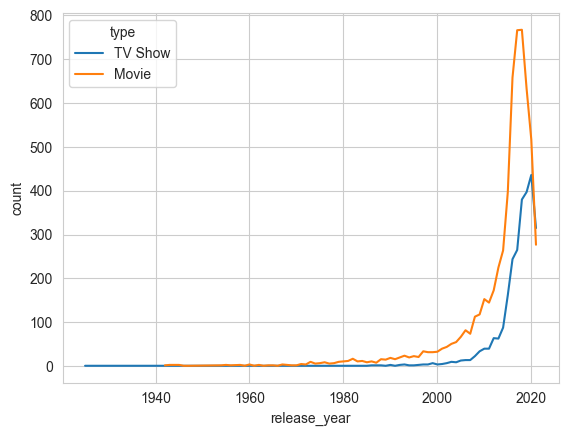

In [23]:
# we can see that most tv shows and movies on Netflix are released after the year 2010
sns.lineplot(data=movies_shows_df, x="release_year", y="count", hue='type')